In [1]:
import cheetah
import numpy as np
import torch
import matplotlib.pyplot as plt

initializing ocelot...


In [18]:
beam = cheetah.Beam.from_astra('./distributions/ACHIP_EA1_2021.1351.001')
print(round(beam.sigma_x,6))
print(round(beam.sigma_y,6))
print(round(beam.sigma_xp,6))
print(round(beam.sigma_yp,6))
print(round(beam.sigma_s,6))
print(round(beam.sigma_p,6))
print(round(beam.mu_x,6))
print(round(beam.mu_y,6))
print(round(beam.mu_xp,6))
print(round(beam.mu_yp,6))
print(round(beam.mu_s,6))
print(round(beam.mu_p,6))

0.000175
0.000175
4e-06
4e-06
8e-06
0.00228
1e-06
-2e-06
0.0
-0.0
6e-06
0.000383


In [17]:
beam = cheetah.Beam.from_astra('./distributions/ARES_Linac.1351.010')
print(round(beam.sigma_x,6))
print(round(beam.sigma_y,6))
print(round(beam.sigma_xp,6))
print(round(beam.sigma_yp,6))
print(round(beam.sigma_s,6))
print(round(beam.sigma_p,6))
print(round(beam.mu_x,6))
print(round(beam.mu_y,6))
print(round(beam.mu_xp,6))
print(round(beam.mu_yp,6))
print(round(beam.mu_s,6))
print(round(beam.mu_p,6))

0.00057
0.00057
3.9e-05
3.9e-05
0.00079
0.001877
0.0
0.0
0.0
0.0
-1.2e-05
-0.001197


In [16]:
beam.transformed_to()

Beam(n=100000, mu_x=7.412381615653238e-16, mu_xp=-9.345058279590151e-16, mu_y=-1.1732480992523889e-15, mu_yp=-2.594333591948413e-15, sigma_x=1.7500001092685125e-07, sigma_xp=2.0000000233721948e-07, sigma_y=1.7499999671599653e-07, sigma_yp=2.0000000233721948e-07, sigma_s=9.999999974752427e-07, sigma_p=9.999999974752427e-07, energy=157529189.64965832)

In [4]:
torch.std(b.particles,axis=0)

tensor([1.0000e-06, 1.0000e-06, 1.0000e-06, 1.0000e-06, 1.0000e-06, 1.0000e-06,
        0.0000e+00], device='cuda:0')

[5.3418241e-04 1.0193106e-05 5.0012930e-04 1.0153410e-05 1.1771810e-04
 1.5857700e-02 1.0000000e+00]


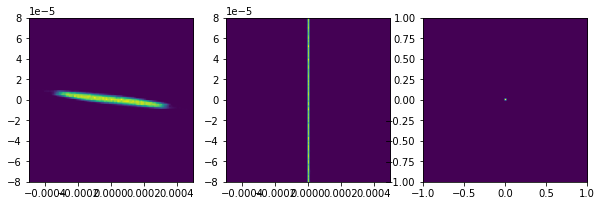

In [22]:
parts = np.array(beam.particles.cpu())
# parts = parts*np.array([2,1,3,1,1,1,1])
print(parts.max(axis=0))

xlim = 5e-4
xplim = 8e-5
xs = np.linspace(-xlim,xlim,100)
xps = np.linspace(-xplim,xplim,100)
rx =xlim/xplim 
ys = xs
yps = xps
ry = rx

slim = 1
splim = 1
ss = np.linspace(-slim,slim,100)
sps = np.linspace(-splim,splim,100)

rs = slim/splim

hists = []

xxp = np.histogram2d(parts[:,0],parts[:,1],bins = (xs,xps))[0]
yyp = np.histogram2d(parts[:,2],parts[:,3],bins = (yps,ys))[0]
ssp = np.histogram2d(parts[:,4],parts[:,5],bins = (ss,sps))[0]

fig, ax = plt.subplots(1,3,figsize = (10,10))

ax[0].imshow(xxp.transpose(),extent=(xs[0],xs[-1],xps[0],xps[-1]))
ax[0].set_aspect(rx)

ax[1].imshow(yyp,extent=(ys[0],ys[-1],yps[0],yps[-1]))
ax[1].set_aspect(ry)

ax[2].imshow(ssp,extent=(ss[0],ss[-1],sps[0],sps[-1]))
ax[2].set_aspect(rs)

In [136]:
parts.std(axis=0)

array([0.9999837 , 0.99998564, 0.99999076, 0.999988  , 0.99999064,
       0.99998814, 0.        ], dtype=float32)

In [221]:
def randomizer(parray, 
            sigmas=torch.ones(6,device='cuda'), 
            mus=torch.zeros(6,device='cuda')):

            phase_space = parray[:,:-1]
            
            means = torch.mean(phase_space,axis=0)
            phase_space = torch.add(phase_space,-means)

            stds = torch.std(phase_space, axis=0)
            phase_space = torch.div(phase_space, stds)

            phase_space = torch.mul(phase_space, sigmas)
            phase_space = torch.add(phase_space, mus)
            
            parray = torch.cat(
                (phase_space,torch.ones(phase_space.shape[0], 1, device='cuda')),1)

            return parray 

In [222]:
randomizer(b.particles)

tensor([[-0.0044, -0.0146,  0.0067,  ..., -0.7146, -0.1679,  1.0000],
        [ 0.3469,  0.1544,  0.0067,  ..., -0.4416, -0.6177,  1.0000],
        [-0.0046, -0.0145,  0.2613,  ..., -0.6291,  0.3520,  1.0000],
        ...,
        [ 1.1881,  1.4802,  1.1622,  ..., -0.6108, -0.4079,  1.0000],
        [ 0.3182,  0.3146,  1.5960,  ..., -0.5662,  0.4621,  1.0000],
        [-0.3630, -0.6627,  1.2453,  ...,  0.1066, -0.9641,  1.0000]],
       device='cuda:0')

In [223]:
torch.random.uniform()

AttributeError: module 'torch.random' has no attribute 'uniform'

In [226]:
torch.FloatTensor(3,4).uniform_(2,3)

tensor([[2.4088, 2.5350, 2.3522, 2.4377],
        [2.3920, 2.1297, 2.7811, 2.0610],
        [2.5026, 2.8289, 2.1593, 2.0417]])

In [10]:
torch.FloatTensor()

tensor([3., 4.])

In [11]:
np.arange(1,1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])